In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data=pd.read_csv("airquality.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Medium
3,4,18.0,313.0,11.5,62,5,4,Medium
4,5,NaN,NaN,14.3,56,5,5,NaN
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,Low
149,150,NaN,145.0,13.2,77,9,27,Low
150,151,14.0,191.0,14.3,75,9,28,High
151,152,18.0,131.0,8.0,76,9,29,High


In [17]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Medium
3,4,18.0,313.0,11.5,62,5,4,Medium
4,5,NaN,NaN,14.3,56,5,5,NaN


In [18]:
data.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
148,149,30.0,193.0,6.9,70,9,26,Low
149,150,NaN,145.0,13.2,77,9,27,Low
150,151,14.0,191.0,14.3,75,9,28,High
151,152,18.0,131.0,8.0,76,9,29,High
152,153,20.0,223.0,11.5,68,9,30,Medium


In [19]:
data.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
Humidity       6
dtype: int64

In [20]:
data=data.drop("Unnamed: 0",axis=1)
data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,High
1,36.0,118.0,8.0,72,5,2,High
2,12.0,149.0,12.6,74,5,3,Medium
3,18.0,313.0,11.5,62,5,4,Medium
4,NaN,NaN,14.3,56,5,5,NaN
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,Low
149,NaN,145.0,13.2,77,9,27,Low
150,14.0,191.0,14.3,75,9,28,High
151,18.0,131.0,8.0,76,9,29,High


In [21]:
data["Ozone"].fillna(data["Ozone"].mean(),inplace=True)
data["Solar.R"].fillna(data["Solar.R"].mean(),inplace=True)
data["Humidity"].fillna("Medium",inplace=True)
data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,High
1,36.00000,118.000000,8.0,72,5,2,High
2,12.00000,149.000000,12.6,74,5,3,Medium
3,18.00000,313.000000,11.5,62,5,4,Medium
4,42.12931,185.931507,14.3,56,5,5,Medium
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,Low
149,42.12931,145.000000,13.2,77,9,27,Low
150,14.00000,191.000000,14.3,75,9,28,High
151,18.00000,131.000000,8.0,76,9,29,High


In [22]:
data.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
data["Humidity"]=labelEncoder.fit_transform(data["Humidity"])
data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,0
1,36.00000,118.000000,8.0,72,5,2,0
2,12.00000,149.000000,12.6,74,5,3,2
3,18.00000,313.000000,11.5,62,5,4,2
4,42.12931,185.931507,14.3,56,5,5,2
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,1
149,42.12931,145.000000,13.2,77,9,27,1
150,14.00000,191.000000,14.3,75,9,28,0
151,18.00000,131.000000,8.0,76,9,29,0


In [24]:
x=data[["Day"]]
y=data[["Temp"]]

In [43]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.25)

In [44]:
print(Xtrain.shape)
print(Xtest.shape)
print(Xtest.shape)
print(Ytest.shape)

(114, 1)
(39, 1)
(39, 1)
(39, 1)


In [45]:
from sklearn.linear_model import LinearRegression
linearRegression=LinearRegression()
linearRegression.fit(Xtrain,Ytrain)

LinearRegression()

In [46]:
predict=linearRegression.predict(Xtest)
predict

array([[75.64158012],
       [80.70877824],
       [76.340504  ],
       [80.70877824],
       [76.51523497],
       [75.81631109],
       [79.66039242],
       [77.38888982],
       [77.38888982],
       [80.00985436],
       [80.53404727],
       [77.03942788],
       [77.21415885],
       [75.64158012],
       [77.73835176],
       [79.48566145],
       [77.03942788],
       [77.21415885],
       [78.08781369],
       [76.16577303],
       [78.6120066 ],
       [76.68996594],
       [79.83512339],
       [75.64158012],
       [76.340504  ],
       [79.13619951],
       [77.91308273],
       [80.18458533],
       [78.26254466],
       [78.6120066 ],
       [76.68996594],
       [80.53404727],
       [76.340504  ],
       [80.00985436],
       [76.68996594],
       [78.96146854],
       [80.53404727],
       [76.51523497],
       [79.83512339]])

In [47]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(predict,Ytest)
mse

96.38902416887373

In [49]:
rmse=np.sqrt(mse)
rmse

9.817791206217095

Text(0, 0.5, 'Temperature')

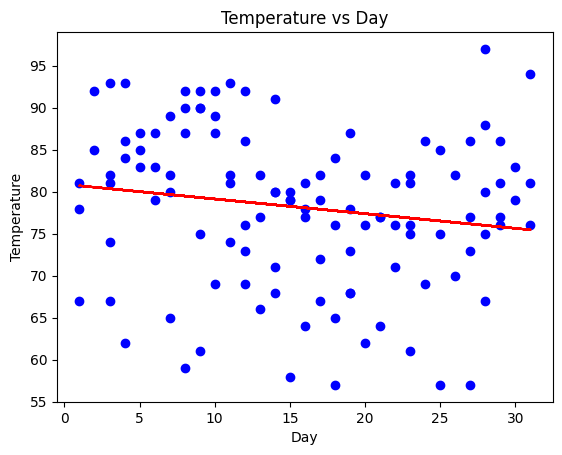

In [53]:
plt.scatter(Xtrain,Ytrain,color="blue")
plt.plot(Xtrain,linearRegression.predict(Xtrain),color="red")
plt.title("Temperature vs Day")
plt.xlabel("Day")
plt.ylabel("Temperature")